# Assignment 
Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement
Company want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
Company required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Interpretation of Data
1) Reading/understanding/Visualising the data
2) Preparing the data for modelling
3) Training the model
4) Residual analysis
5) Prediction and Evaluation on the test data


In [1037]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



# Step 1 - Reading and Understanding the Data

In [1038]:
df =  pd.read_csv("day.csv")
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [1039]:
df.shape

(730, 16)

In [1040]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1041]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1042]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1043]:
df.size

11680

In [1044]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [1045]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06/01/18,1,0,1,0,6,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07/01/18,1,0,1,0,0,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08/01/18,1,0,1,0,1,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09/01/18,1,0,1,0,2,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10/01/18,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Dropping columns

* Record Index
* dteday
* Casual and Registered


In [1046]:
df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [1047]:
df.shape

(730, 12)

# Business Problem Statement 
Company required to model the demand for shared bikes with the available independent variables.

### Attributes Information
	- instant: record index  ---> Dropped
	- dteday : date ---> Dropped
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users ---> Dropped
	- registered: count of registered users ---> Dropped
	- cnt: count of total rental bikes including both casual and registered



In [1048]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1049]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [1050]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1051]:
num_col = ["cnt", "temp", "atemp", "hum", "windspeed"]
cat_col = ["yr", "holiday", "workingday", "weathersit","season", "mnth", "weekday"]

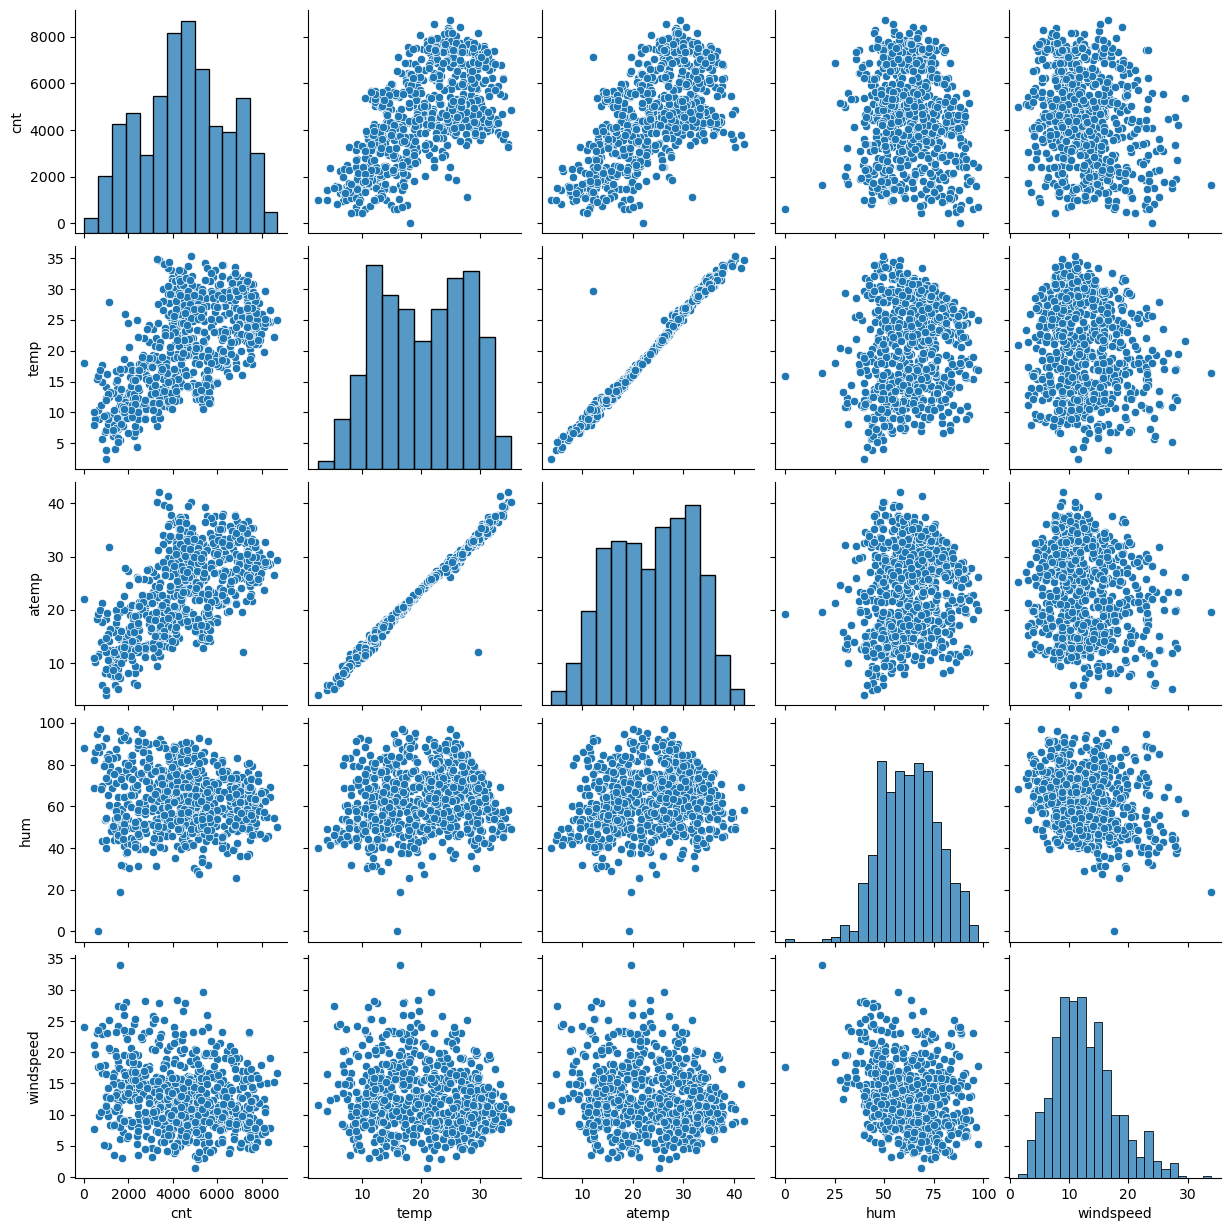

(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


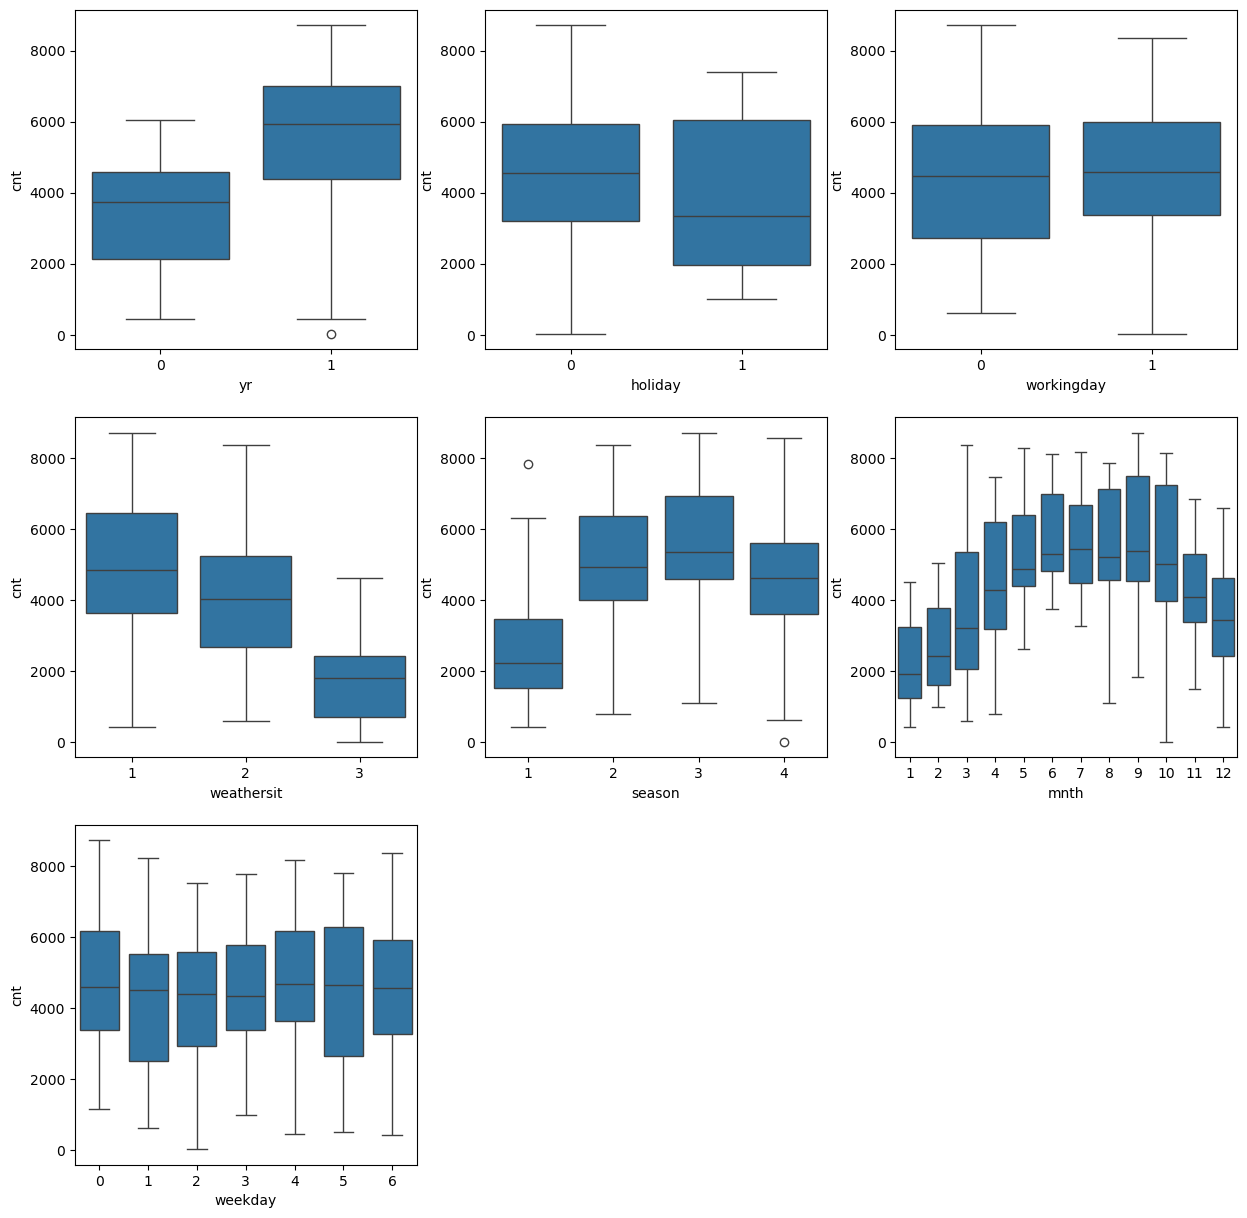

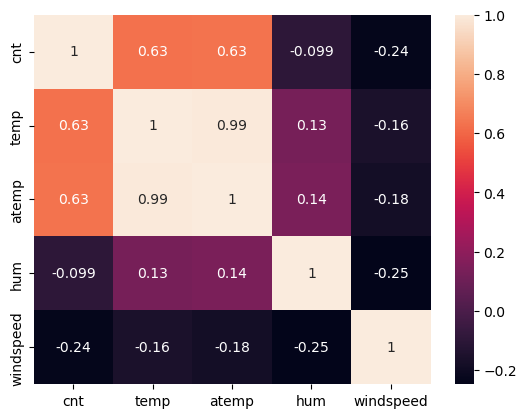

In [1052]:
# Univariate Analysis
sns.pairplot(df[num_col])  # numerical - histplot  #categorical - countplot
plt.show()

# Bivariate Analysis     #numerical vs numerical - scatter plot  #categorical vs numerical - boxplot 
# plt.figure(figsize=(12,20))  
# plt.subplot(2,3,1)
# sns.boxplot(x="yr", y="cnt", data = df)

# plt.subplot(2,3,2)
# sns.boxplot(x="holiday", y="cnt", data = df)

# plt.subplot(2,3,3)
# sns.boxplot(x="workingday", y="cnt", data = df)

# plt.subplot(2,3,4)
# sns.boxplot(x="weathersit", y="cnt", data = df)

# plt.subplot(2,3,5)
# sns.boxplot(x="season", y="cnt", data = df)

# plt.subplot(2,3,6)
# sns.boxplot(x="mnth", y="cnt", data = df) 
# plt.show()

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

# Multivariate Analysis
sns.heatmap(df[num_col].corr(), annot=True )
plt.show()

### When Correlation between two features is 1 and -1  it indicates high similarity and and dropping one of the highly correlated features is advisable for several reasons:

* Redundancy: Highly correlated features convey the same information, leading to redundancy. Including both may not provide additional benefits and can result in multicollinearity issues.
* Simplicity and Interpretability: A model with fewer features is simpler and more interpretable. Redundant features do not add value and can complicate the interpretation of the model’s behavior.
* Computational Efficiency: Training and running a model with fewer features are often computationally more efficient, particularly with large datasets.
* Avoiding Overfitting: Including highly correlated features may contribute to overfitting, where the model fits the training data too closely and struggles to generalize to new, unseen data.

#### Inferences:-
*  Temp and atemp are highly corelated hence we can take action to remove one of them as it can create Multicolinearity
* Temp and atemp also has high corelation with cnt variable

In [1053]:
# drop column atemp
df.drop(["atemp"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Analysis of Categorical Variable with Target Variable

In [1054]:
varlist = ['season', 'weekday', 'weathersit', 'mnth']

#df.season = df.season.apply(lambda x: x.map({ "1":"spring", "2":"summer", "3":"fall", "4":"winter"}))
df['season'] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weathersit'] = df.weathersit.map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Rainy"})

# season_dum =  pd.get_dummies(df['season'], dtype=int, drop_first=True)  
# weekday_dum =  pd.get_dummies(df['weekday'], dtype=int, drop_first=True)  
# mnth_dum =  pd.get_dummies(df['mnth'], dtype=int, drop_first=True)  
# weathersit_dum =  pd.get_dummies(df['weathersit'], dtype=int, drop_first=True)  

In [1055]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Friday,1,Mist,10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Saturday,1,Mist,10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Sunday,0,Mist,10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Monday,0,Clear,10.489153,48.3333,23.500518,1796


(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


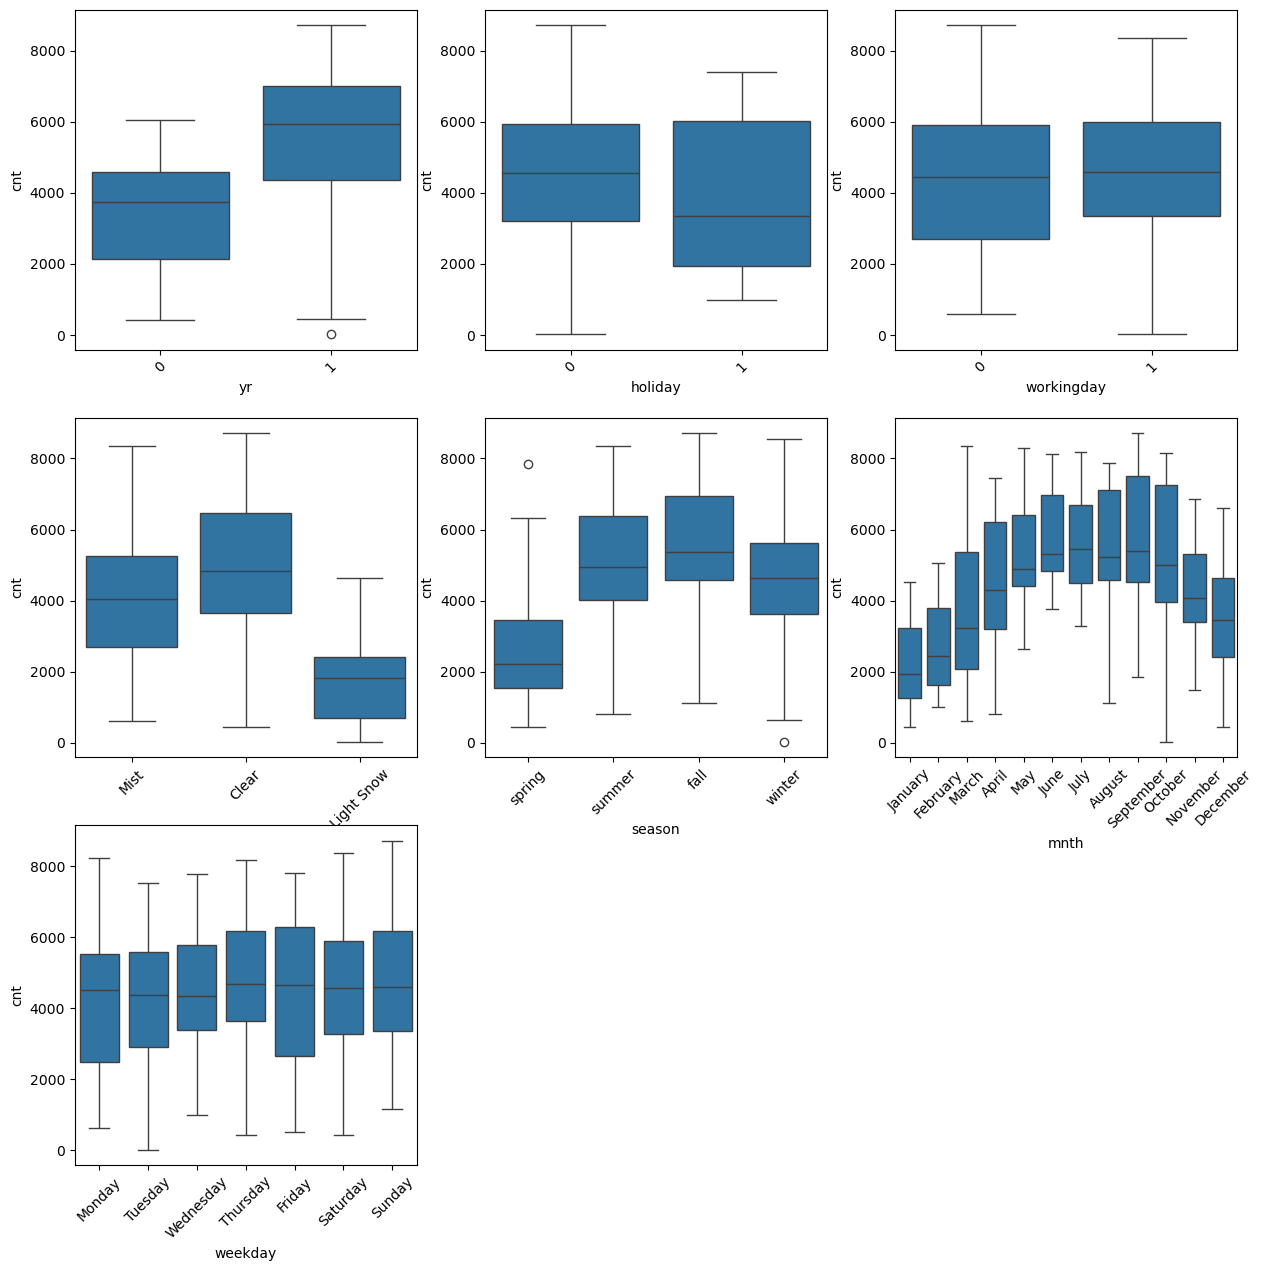

In [1056]:
# Box Plot to see categorical columns to see the deman for Bike Analysis

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    a = sns.boxplot(data=df, x=i[1], y='cnt')
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

Inferences: -
* Season 3 fall has the highest demand
* demand grown immediate next year
* demand continously growing each month till September
* demand in holiday is increased
* demand in clear climate is more
* Demand on Saturday is increased

#### Verifying with Regression plot that corealation obtained above for variables w.r.t cnt is correct

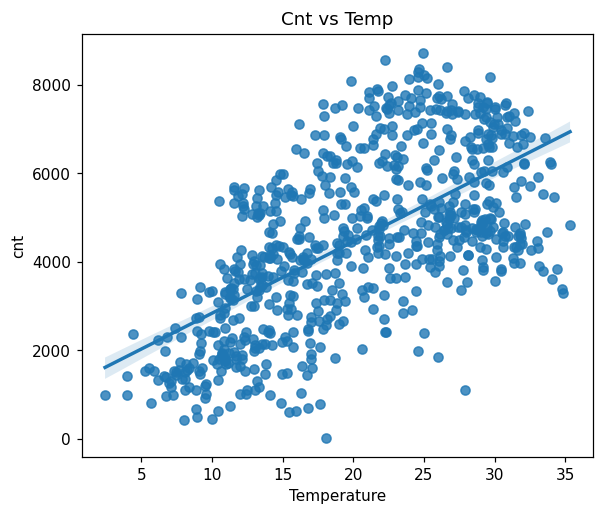

In [1057]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Temp")
sns.regplot(data=df,y="cnt", x= "temp")
plt.xlabel("Temperature")
plt.show()

Inferences :-
Demands for bikes is highy corelated to Temp
We can see count is linearly increasing as temperature increases

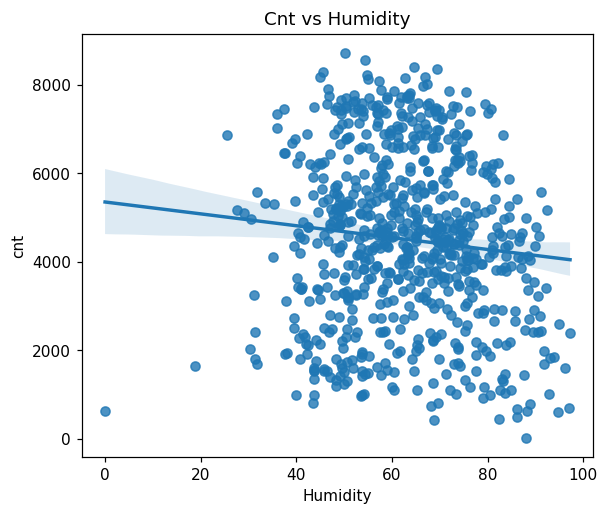

In [1058]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Humidity")
sns.regplot(data=df,y="cnt", x= "hum")
plt.xlabel("Humidity")
plt.show()

Inferences:-
Demands is decreasing as the humidity is increasing
Demand for bike is negativley corelated with Humidity

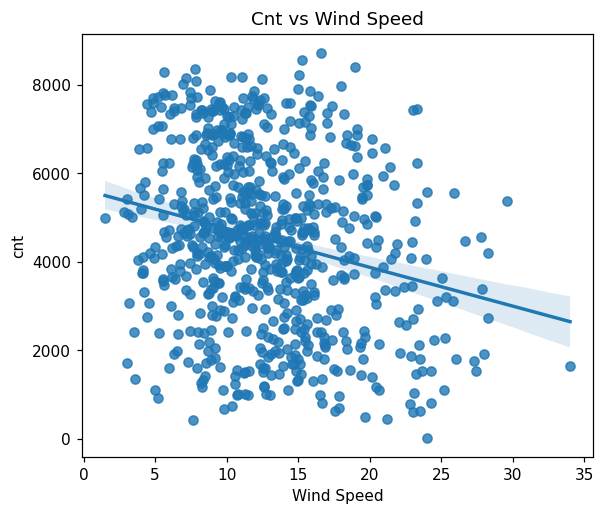

In [1059]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Wind Speed")
sns.regplot(data=df,y="cnt", x= "windspeed")
plt.xlabel("Wind Speed")
plt.show()

Inferences:-
Demands is decreasing as the windspeed is increasing
Demand for bike is negativley corelated with Windspeed

# Step 2 - Preparing the Data for Modelling
Encoding:-
 - Converting binary 1/0
 - Converting to dummy variables

### Create dummy variables for all Categorical Variables

In [1060]:
df_bikessharing =  pd.get_dummies(data=df,columns=varlist,drop_first= True, dtype=int)

In [1061]:
df_bikessharing.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1062]:
df_bikessharing.shape

(730, 29)

In [1063]:
df_bikessharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

# Step 3 - Model Building 
### Train-Test Split

In [1064]:
y = df_bikessharing.pop("cnt")
X = df_bikessharing

In [1065]:
X.shape

(730, 28)

In [1066]:
y.shape

(730,)

### Mixed Approach - Automated Approach and Step Wise Reducing Feature using VIF and P stats

In [1067]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=100)

In [1068]:
y_train.shape

(510,)

In [1069]:
X_train.shape

(510, 28)

In [1070]:
X_test.shape

(220, 28)

In [1071]:
y_test.shape

(220,)

In [1072]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,72.9583,14.707907,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [1073]:
X_train.columns = X_train.columns.astype('str')
X_test.columns =  X_test.columns.astype('str')
num_vars = ["temp", "hum","windspeed"]
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])



In [1074]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
576,1,0,1,1.230870,0.515796,-0.331282,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.421238,-0.070634,-0.386359,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,-1.295618,-1.046051,2.017388,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,-0.628327,-1.001847,-0.780539,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,-0.849222,0.695551,0.354275,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,1.447165,0.200476,-0.788409,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,-1.483898,-1.472451,-1.235018,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
350,0,0,0,-1.281812,-0.497932,0.653940,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
79,0,0,1,-0.331400,0.750773,1.232031,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1075]:
X_train_df = pd.DataFrame(X_train,columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [1076]:
X_train_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
576,1,0,1,1.230870,0.515796,-0.331282,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.421238,-0.070634,-0.386359,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1077]:
X_test_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
184,0,1,0,1.304506,0.047244,-1.395126,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,1.612837,-0.276917,-0.985373,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Feature Selection - There are two methods Standaridization and MinMax, here we have used Standaridization

In [1078]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1079]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=20)

In [1080]:
selector = selector.fit(X_train, y_train)
print(selector.support_)

[ True  True False  True  True  True  True  True  True  True False False
 False  True False  True  True  True  True  True  True  True False False
  True  True False  True]


In [1081]:
selected_features = X_train_df.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Monday', 'weekday_Tuesday',
       'weathersit_Light Snow', 'weathersit_Mist', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_May', 'mnth_November', 'mnth_September'],
      dtype='object')

In [1082]:
X_train = X_train_df[selected_features]
X_test = X_test_df[selected_features]
X_train.head(2)

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,weekday_Tuesday,weathersit_Light Snow,weathersit_Mist,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_May,mnth_November,mnth_September
576,1,0,1.230870,0.515796,-0.331282,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,-0.421238,-0.070634,-0.386359,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Modelling

In [1083]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [1084]:
X_train_sm.shape

(510, 21)

In [1085]:
X_test_sm.shape

(220, 21)

In [1086]:
y_train.shape

(510,)

In [1087]:
X_train_sm.dtypes

const                    float64
yr                         int64
holiday                    int64
temp                     float64
hum                      float64
windspeed                float64
season_spring              int64
season_summer              int64
season_winter              int64
weekday_Monday             int64
weekday_Tuesday            int64
weathersit_Light Snow      int64
weathersit_Mist            int64
mnth_August                int64
mnth_December              int64
mnth_February              int64
mnth_January               int64
mnth_July                  int64
mnth_May                   int64
mnth_November              int64
mnth_September             int64
dtype: object

In [1088]:
X_train_sm.head(1)

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,...,weathersit_Light Snow,weathersit_Mist,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_May,mnth_November,mnth_September
576,1.0,1,0,1.23087,0.515796,-0.331282,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1089]:
y_train.dtypes

dtype('int64')

### Model 1

In [1090]:
model1 = sm.OLS(np.array(y_train), X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.18e-186
Time:                        16:02:57   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     489   BIC:                             8339.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3621.0946    193.767     18.688      0.000    3240.376    4001.814
yr                     2009.6039     69.843     28.773      0.000    1872.375    2146.833
holiday                -779.7904    221.546     -3.520      0.000   -1215.090    -344.491
temp                    883.9289     75.789     11.663      0.000     735.018    1032.840
hum                    -202.2901     48.028     -4.212      0.000    -296.657    -107.923
windspeed              -269.0788     37.843     -7.110      0.000    -343.433    -194.724
season_spring          -371.3064    232.732     -1.595      0.111    -828.584      85.971
season_summer           377.6337    203.470      1.856      0.064     -22.150     777.417
season_winter           970.0981    198.249      4.893      0.000     580.574    1359.622
weekday_Monday         -226.8270     96.955     -2.340      0.020    -417.326     -36.328
weekday_Tuesday        -237.2231     97.725     -2.427      0.016    -429.235     -45.211
weathersit_Light Snow -2173.9726    228.904     -9.497      0.000   -2623.729   -1724.216
weathersit_Mist        -494.7108     90.296     -5.479      0.000    -672.127    -317.295
mnth_August             164.4588    206.492      0.796      0.426    -241.262     570.179
mnth_December          -402.4060    159.002     -2.531      0.012    -714.818     -89.994
mnth_February          -327.7203    187.348     -1.749      0.081    -695.828      40.387
mnth_January           -561.3360    185.864     -3.020      0.003    -926.526    -196.146
mnth_July              -314.8787    215.406     -1.462      0.144    -738.114     108.356
mnth_May                178.1651    151.413      1.177      0.240    -119.336     475.666
mnth_November          -390.5455    164.895     -2.368      0.018    -714.536     -66.555
mnth_September          736.4283    187.352      3.931      0.000     368.314    1104.542
==============================================================================
Omnibus:                       73.579   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.004
Skew:                          -0.721   Prob(JB):                     1.23e-42
Kurtosis:                       5.646   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1091]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,32.107233
1,yr,1.042598
2,holiday,1.042629
3,temp,4.911899
4,hum,1.972568
5,windspeed,1.224642
6,season_spring,8.523576
7,season_summer,6.585743
8,season_winter,6.252077
9,weekday_Monday,1.052313


We could have 
 
 - High P-values , high VIF
 - High - Low
    - High P , Low VIF -- remove these first
    - Low P, High VIF  -- remove these after the ones above

 - Low P, Low VIF   

In [1092]:
X_train_sm = X_train_sm.drop("mnth_August", axis=1)
X_test_sm = X_test_sm.drop("mnth_August", axis=1)

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_August has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

### Model 2

In [1093]:
model2 = sm.OLS(np.array(y_train), X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.45e-187
Time:                        16:02:57   Log-Likelihood:                -4104.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3730.7560    136.285     27.375      0.000    3462.981    3998.531
yr                     2011.2332     69.787     28.820      0.000    1874.115    2148.351
holiday                -783.6943    221.409     -3.540      0.000   -1218.723    -348.666
temp                    888.3845     75.554     11.758      0.000     739.936    1036.833
hum                    -200.6082     47.964     -4.183      0.000    -294.848    -106.368
windspeed              -269.3307     37.827     -7.120      0.000    -343.654    -195.007
season_spring          -476.3044    191.720     -2.484      0.013    -852.998     -99.610
season_summer           266.5543    148.094      1.800      0.072     -24.424     557.532
season_winter           872.8984    156.173      5.589      0.000     566.047    1179.749
weekday_Monday         -224.6026     96.878     -2.318      0.021    -414.951     -34.254
weekday_Tuesday        -238.9339     97.664     -2.446      0.015    -430.827     -47.041
weathersit_Light Snow -2182.9245    228.543     -9.552      0.000   -2631.969   -1733.880
weathersit_Mist        -491.9486     90.196     -5.454      0.000    -669.166    -314.731
mnth_December          -410.4941    158.618     -2.588      0.010    -722.150     -98.838
mnth_February          -327.6307    187.279     -1.749      0.081    -695.599      40.337
mnth_January           -561.2219    185.794     -3.021      0.003    -926.274    -196.170
mnth_July              -431.8254    157.544     -2.741      0.006    -741.371    -122.280
mnth_May                174.4596    151.285      1.153      0.249    -122.788     471.707
mnth_November          -401.1348    164.297     -2.442      0.015    -723.948     -78.321
mnth_September          642.6363    145.659      4.412      0.000     356.443     928.830
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1094]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,15.895086
1,yr,1.041703
2,holiday,1.042118
3,temp,4.885136
4,hum,1.968755
5,windspeed,1.224556
6,season_spring,5.788535
7,season_summer,3.491443
8,season_winter,3.882750
9,weekday_Monday,1.051440


In [1095]:
res2.params

const                    3730.755974
yr                       2011.233178
holiday                  -783.694280
temp                      888.384467
hum                      -200.608179
windspeed                -269.330674
season_spring            -476.304370
season_summer             266.554276
season_winter             872.898351
weekday_Monday           -224.602554
weekday_Tuesday          -238.933897
weathersit_Light Snow   -2182.924518
weathersit_Mist          -491.948554
mnth_December            -410.494078
mnth_February            -327.630716
mnth_January             -561.221882
mnth_July                -431.825398
mnth_May                  174.459585
mnth_November            -401.134766
mnth_September            642.636301
dtype: float64

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_May has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

In [1096]:
X_train_sm = X_train_sm.drop("mnth_May", axis=1)
X_test_sm = X_test_sm.drop("mnth_May", axis=1)

### Model 3

In [1097]:
model3 = sm.OLS(np.array(y_train), X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.77e-188
Time:                        16:02:57   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3717.0866    135.814     27.369      0.000    3450.238    3983.935
yr                     2006.8712     69.707     28.790      0.000    1869.910    2143.833
holiday                -790.3886    221.407     -3.570      0.000   -1225.411    -355.366
temp                    903.6024     74.417     12.142      0.000     757.387    1049.818
hum                    -193.5954     47.593     -4.068      0.000    -287.106    -100.085
windspeed              -271.4539     37.795     -7.182      0.000    -345.714    -197.194
season_spring          -447.4162    190.140     -2.353      0.019    -821.004     -73.828
season_summer           341.2928    133.204      2.562      0.011      79.572     603.014
season_winter           888.7058    155.622      5.711      0.000     582.938    1194.474
weekday_Monday         -229.2059     96.829     -2.367      0.018    -419.455     -38.956
weekday_Tuesday        -241.8684     97.664     -2.477      0.014    -433.760     -49.977
weathersit_Light Snow -2197.4298    228.273     -9.626      0.000   -2645.942   -1748.918
weathersit_Mist        -493.5994     90.215     -5.471      0.000    -670.854    -316.345
mnth_December          -400.3502    158.427     -2.527      0.012    -711.629     -89.071
mnth_February          -317.0551    187.117     -1.694      0.091    -684.703      50.593
mnth_January           -548.5377    185.531     -2.957      0.003    -913.070    -184.005
mnth_July              -434.9450    157.574     -2.760      0.006    -744.548    -125.342
mnth_November          -388.5144    163.987     -2.369      0.018    -710.717     -66.312
mnth_September          642.6230    145.708      4.410      0.000     356.335     928.911
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inferences - When there is high P and Low VIF, we need to remove first these
* mnth_February has high P-stats
* R2 and adjusted R2 are similar and good i.e. 84% 

In [1098]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,15.774841
1,yr,1.038643
2,holiday,1.041402
3,temp,4.736104
4,hum,1.937107
5,windspeed,1.221655
6,season_spring,5.689707
7,season_summer,2.822759
8,season_winter,3.852837
9,weekday_Monday,1.049655


In [1099]:
res3.params

const                    3717.086641
yr                       2006.871236
holiday                  -790.388567
temp                      903.602370
hum                      -193.595416
windspeed                -271.453927
season_spring            -447.416166
season_summer             341.292842
season_winter             888.705847
weekday_Monday           -229.205910
weekday_Tuesday          -241.868439
weathersit_Light Snow   -2197.429788
weathersit_Mist          -493.599362
mnth_December            -400.350176
mnth_February            -317.055118
mnth_January             -548.537727
mnth_July                -434.945005
mnth_November            -388.514434
mnth_September            642.623006
dtype: float64

In [1100]:
X_train_sm = X_train_sm.drop("mnth_February", axis=1)
X_test_sm = X_test_sm.drop("mnth_February", axis=1)

### Model 4

In [1101]:
model4 = sm.OLS(np.array(y_train), X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.21e-188
Time:                        16:02:57   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3680.1122    134.304     27.401      0.000    3416.231    3943.993
yr                     2003.6669     69.814     28.700      0.000    1866.496    2140.837
holiday                -811.1790    221.487     -3.662      0.000   -1246.356    -376.002
temp                    935.6516     72.110     12.975      0.000     793.970    1077.333
hum                    -196.2037     47.658     -4.117      0.000    -289.842    -102.565
windspeed              -269.6699     37.852     -7.124      0.000    -344.042    -195.298
season_spring          -534.1854    183.462     -2.912      0.004    -894.651    -173.720
season_summer           370.8733    132.306      2.803      0.005     110.918     630.828
season_winter           904.3480    155.643      5.810      0.000     598.540    1210.156
weekday_Monday         -223.8633     96.961     -2.309      0.021    -414.372     -33.354
weekday_Tuesday        -243.3021     97.846     -2.487      0.013    -435.550     -51.055
weathersit_Light Snow -2185.1971    228.592     -9.559      0.000   -2634.334   -1736.060
weathersit_Mist        -490.8831     90.372     -5.432      0.000    -668.445    -313.321
mnth_December          -318.5476    151.179     -2.107      0.036    -615.584     -21.512
mnth_January           -378.8644    156.484     -2.421      0.016    -686.324     -71.405
mnth_July              -443.6747    157.789     -2.812      0.005    -753.698    -133.651
mnth_November          -345.4514    162.313     -2.128      0.034    -664.364     -26.538
mnth_September          656.2741    145.762      4.502      0.000     369.882     942.666
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1102]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,15.367617
1,yr,1.037878
2,holiday,1.038203
3,temp,4.430142
4,hum,1.935080
5,windspeed,1.220707
6,season_spring,5.277011
7,season_summer,2.774275
8,season_winter,3.839279
9,weekday_Monday,1.048542


In [1103]:
res4.params

const                    3680.112217
yr                       2003.666868
holiday                  -811.179000
temp                      935.651625
hum                      -196.203713
windspeed                -269.669877
season_spring            -534.185358
season_summer             370.873339
season_winter             904.348028
weekday_Monday           -223.863326
weekday_Tuesday          -243.302137
weathersit_Light Snow   -2185.197111
weathersit_Mist          -490.883065
mnth_December            -318.547577
mnth_January             -378.864450
mnth_July                -443.674739
mnth_November            -345.451383
mnth_September            656.274083
dtype: float64

We could have 
 
 - High P-values , high VIF
 - High - Low
    - High P , Low VIF -- remove these first
    - Low P, High VIF  -- remove these after the ones above

 - Low P, Low VIF 

Inferences - End check is Low P and High VIF, we need to remove first these
* season_spring has high VIF
* R2 and adjusted R2 are similar and good i.e. 84% 

In [1104]:
X_train_sm = X_train_sm.drop("season_spring", axis=1)
X_test_sm = X_test_sm.drop("season_spring", axis=1)

### Model 5

In [1105]:
model5 = sm.OLS(np.array(y_train), X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          6.01e-188
Time:                        16:02:57   Log-Likelihood:                -4111.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     493   BIC:                             8328.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3379.2158     86.429     39.098      0.000    3209.401    3549.030
yr                     1991.8223     70.222     28.365      0.000    1853.851    2129.794
holiday                -839.9469    222.938     -3.768      0.000   -1277.973    -401.921
temp                   1080.1941     52.697     20.498      0.000     976.655    1183.733
hum                    -211.1415     47.739     -4.423      0.000    -304.939    -117.344
windspeed              -282.0715     37.896     -7.443      0.000    -356.529    -207.614
season_summer           637.8373     96.107      6.637      0.000     449.008     826.667
season_winter          1209.5432    115.927     10.434      0.000     981.771    1437.315
weekday_Monday         -216.8406     97.663     -2.220      0.027    -408.729     -24.953
weekday_Tuesday        -248.3866     98.570     -2.520      0.012    -442.055     -54.718
weathersit_Light Snow -2131.7239    229.575     -9.286      0.000   -2582.789   -1680.658
weathersit_Mist        -465.9655     90.645     -5.141      0.000    -644.064    -287.867
mnth_December          -266.8647    151.268     -1.764      0.078    -564.074      30.344
mnth_January           -412.2534    157.242     -2.622      0.009    -721.201    -103.306
mnth_July              -356.1170    156.067     -2.282      0.023    -662.756     -49.478
mnth_November          -259.6889    160.825     -1.615      0.107    -575.675      56.297
mnth_September          785.8824    139.847      5.620      0.000     511.112    1060.652
==============================================================================
Omnibus:                       60.116   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.203
Skew:                          -0.659   Prob(JB):                     1.45e-28
Kurtosis:                       5.073   Cond. No.                         8.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1106]:
res5.params

const                    3379.215754
yr                       1991.822321
holiday                  -839.946911
temp                     1080.194147
hum                      -211.141523
windspeed                -282.071495
season_summer             637.837252
season_winter            1209.543168
weekday_Monday           -216.840571
weekday_Tuesday          -248.386641
weathersit_Light Snow   -2131.723926
weathersit_Mist          -465.965510
mnth_December            -266.864750
mnth_January             -412.253449
mnth_July                -356.117035
mnth_November            -259.688868
mnth_September            785.882362
dtype: float64

In [1107]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [ variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,6.269122
1,yr,1.034355
2,holiday,1.036138
3,temp,2.330590
4,hum,1.912656
5,windspeed,1.205251
6,season_summer,1.441975
7,season_winter,2.098065
8,weekday_Monday,1.047893
9,weekday_Tuesday,1.056360


#### Inferences
*  mnth_November - High P and Low VIF Hence need to be dropped

In [1108]:
X_train_sm = X_train_sm.drop("mnth_November", axis=1)
X_test_sm = X_test_sm.drop("mnth_November", axis=1)

### Model 6

In [1109]:
model6 = sm.OLS(np.array(y_train), X_train_sm)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.61e-188
Time:                        16:02:57   Log-Likelihood:                -4112.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3364.0474     86.057     39.091      0.000    3194.965    3533.129
yr                     1991.6485     70.336     28.316      0.000    1853.454    2129.843
holiday                -880.5095    221.879     -3.968      0.000   -1316.452    -444.567
temp                   1095.4077     51.933     21.093      0.000     993.372    1197.444
hum                    -210.5030     47.815     -4.402      0.000    -304.449    -116.557
windspeed              -282.0679     37.958     -7.431      0.000    -356.646    -207.490
season_summer           647.7114     96.068      6.742      0.000     458.959     836.463
season_winter          1114.1562     99.909     11.152      0.000     917.857    1310.455
weekday_Monday         -216.0766     97.821     -2.209      0.028    -408.273     -23.880
weekday_Tuesday        -244.9777     98.707     -2.482      0.013    -438.915     -51.040
weathersit_Light Snow -2108.5631    229.499     -9.188      0.000   -2559.477   -1657.649
weathersit_Mist        -462.3334     90.765     -5.094      0.000    -640.666    -284.001
mnth_December          -173.0637    139.896     -1.237      0.217    -447.928     101.801
mnth_January           -375.3968    155.830     -2.409      0.016    -681.568     -69.226
mnth_July              -364.5942    156.233     -2.334      0.020    -671.557     -57.632
mnth_September          809.8394    139.284      5.814      0.000     536.177    1083.502
==============================================================================
Omnibus:                       56.873   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.944
Skew:                          -0.636   Prob(JB):                     2.45e-26
Kurtosis:                       4.984   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1110]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [ variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,6.195065
1,yr,1.034352
2,holiday,1.022982
3,temp,2.256091
4,hum,1.912525
5,windspeed,1.205251
6,season_summer,1.436137
7,season_winter,1.553278
8,weekday_Monday,1.047868
9,weekday_Tuesday,1.055875


#### Inferences
*  mnth_December - High P and Low VIF Hence need to be dropped

In [1111]:
X_train_sm = X_train_sm.drop("mnth_December", axis=1)
X_test_sm = X_test_sm.drop("mnth_December", axis=1)

### Model 7

In [1112]:
model7 = sm.OLS(np.array(y_train), X_train_sm)
res7 = model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.44e-189
Time:                        16:02:57   Log-Likelihood:                -4113.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3341.8139     84.204     39.687      0.000    3176.373    3507.255
yr                     1990.8019     70.371     28.290      0.000    1852.540    2129.064
holiday                -871.6730    221.882     -3.929      0.000   -1307.620    -435.726
temp                   1114.0778     49.718     22.408      0.000    1016.394    1211.762
hum                    -216.3886     47.603     -4.546      0.000    -309.918    -122.859
windspeed              -278.6168     37.875     -7.356      0.000    -353.033    -204.201
season_summer           662.0860     95.414      6.939      0.000     474.620     849.552
season_winter          1099.7869     99.285     11.077      0.000     904.715    1294.858
weekday_Monday         -217.1396     97.870     -2.219      0.027    -409.431     -24.848
weekday_Tuesday        -241.1319     98.711     -2.443      0.015    -435.076     -47.188
weathersit_Light Snow -2082.6519    228.663     -9.108      0.000   -2531.922   -1633.382
weathersit_Mist        -455.8419     90.661     -5.028      0.000    -633.971    -277.713
mnth_January           -330.9612    151.715     -2.181      0.030    -629.045     -32.877
mnth_July              -371.0847    156.228     -2.375      0.018    -678.037     -64.133
mnth_September          822.2142    138.999      5.915      0.000     549.114    1095.315
==============================================================================
Omnibus:                       54.548   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.476
Skew:                          -0.617   Prob(JB):                     6.21e-25
Kurtosis:                       4.930   Cond. No.                         8.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1113]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_sm.columns
vif_data["VIF"] = [ variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns)) ]
vif_data

,Features,VIF
0,const,5.924863
1,yr,1.034254
2,holiday,1.021922
3,temp,2.065560
4,hum,1.893590
5,windspeed,1.198740
6,season_summer,1.415127
7,season_winter,1.532284
8,weekday_Monday,1.047787
9,weekday_Tuesday,1.054828


In [1114]:
res7.params

const                    3341.813943
yr                       1990.801914
holiday                  -871.672974
temp                     1114.077753
hum                      -216.388556
windspeed                -278.616769
season_summer             662.085962
season_winter            1099.786868
weekday_Monday           -217.139572
weekday_Tuesday          -241.131899
weathersit_Light Snow   -2082.651852
weathersit_Mist          -455.841851
mnth_January             -330.961181
mnth_July                -371.084719
mnth_September            822.214155
dtype: float64

# Step 4 - Residual Analysis

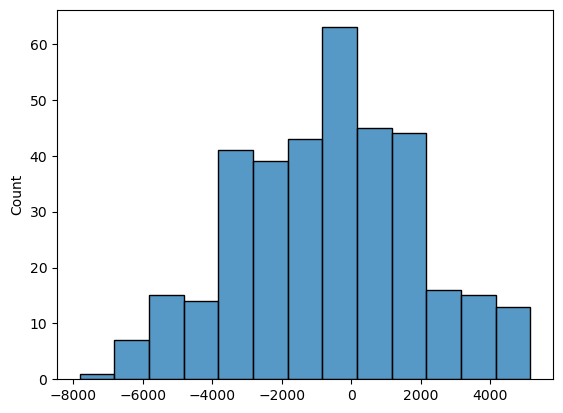

In [1115]:
#y_train_pred = model7.predict(X_train_sm)
sns.histplot(res7.predict(X_train_sm) - y_train.reset_index(drop=True))
plt.show()



In [1116]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = res7.predict(X_train_sm)
y_train_pred

576    6313.504797
426    4530.412984
728    3336.332458
482    5273.114725
111    2352.742592
          ...     
578    7121.153843
53     2351.354510
350    2266.129335
79     2673.130125
520    5812.675184
Length: 510, dtype: float64

# Step 5 - Predictions and Evaluation on Test Set
# fit() - Train
# transform() - Test

In [1117]:
res7.params

const                    3341.813943
yr                       1990.801914
holiday                  -871.672974
temp                     1114.077753
hum                      -216.388556
windspeed                -278.616769
season_summer             662.085962
season_winter            1099.786868
weekday_Monday           -217.139572
weekday_Tuesday          -241.131899
weathersit_Light Snow   -2082.651852
weathersit_Mist          -455.841851
mnth_January             -330.961181
mnth_July                -371.084719
mnth_September            822.214155
dtype: float64

In [1118]:
X_train_sm.head(1)

,const,yr,holiday,temp,hum,windspeed,season_summer,season_winter,weekday_Monday,weekday_Tuesday,weathersit_Light Snow,weathersit_Mist,mnth_January,mnth_July,mnth_September
576,1.0,1,0,1.23087,0.515796,-0.331282,0,0,0,0,0,0,0,1,0


In [1119]:

# predict
y_test_pred = res7.predict(X_test_sm)
y_test_pred

184    3475.017596
535    8125.990320
299    3560.046534
221    5327.439325
152    5529.079714
          ...     
702    6247.184074
127    4408.071618
640    7197.064432
72     2723.701289
653    6440.928594
Length: 220, dtype: float64

# Step 6-  R2 Score 

In [1120]:
# evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test ,y_pred=y_test_pred)

0.80630237346982

In [1121]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
mse

699715.2679104154

# Homoscedacity

R2 valuee is near to R2 value of trained data set

In [1122]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)   

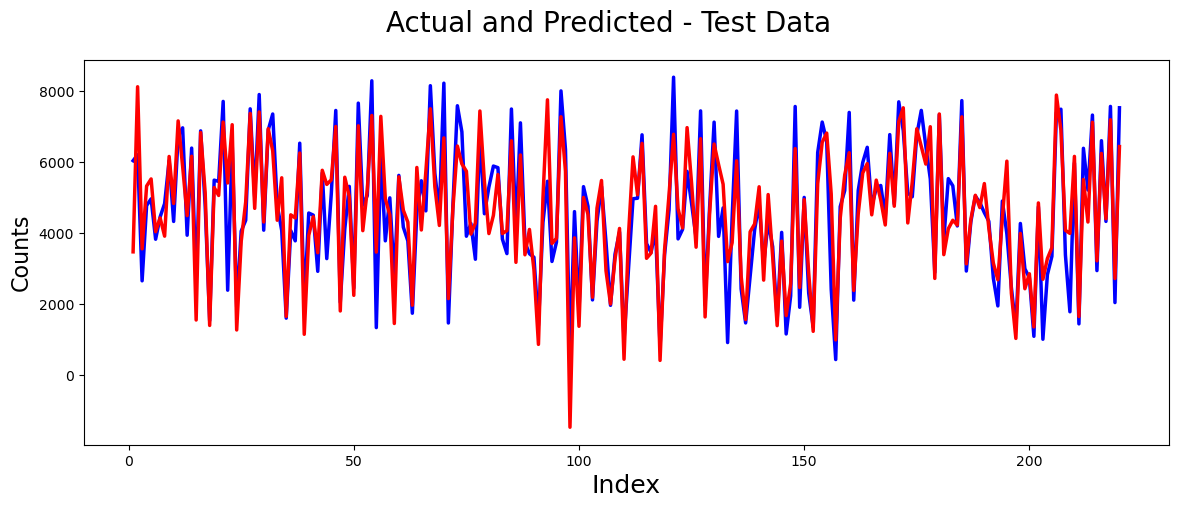

In [1123]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Linearity check


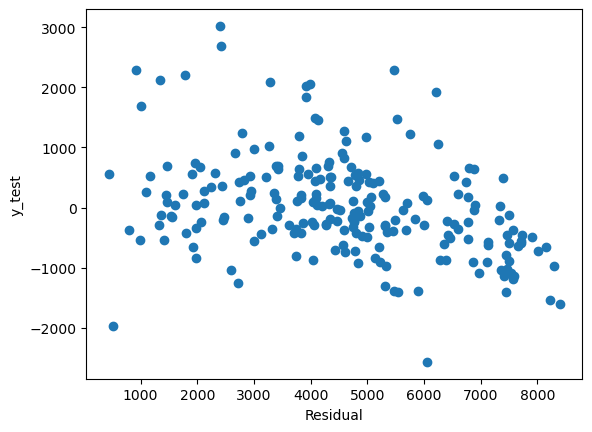

In [1124]:
residual = res7.predict(X_test_sm) - y_test
plt.scatter(y_test,residual)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_test_pred')

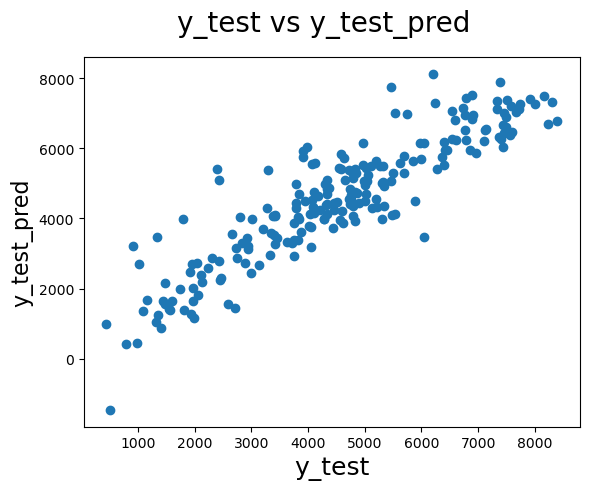

In [1125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
y_test_pred = res7.predict(X_test_sm)
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          

plt.ylabel('y_test_pred', fontsize = 16)

In [1126]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

### Final Equation

# Interpretation of Results

* Company should focus during Holiday as it is negatively correlated and should bring some offers or discounts to attract customers during holiday time
* Company should focus to increase business in the month of Jan and July
* Company should also focus on start of week for Mon/Tue in order to increase the business
*  Overall company should spent on advertisement on month of Jan and July with some offers and also try to increase overall in the month of summer as well

# Conclusion

Significant variables to predict the demand for shared bikes
* holiday
* temp
* hum
* windspeed
* Season (summer and winter)
* months(January, July, September)
* Year (2019)
* weathersit( Light Snow, Mist + Cloudy)